#Import Necessary Library

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.model_selection import train_test_split
import torchvision
import torchvision.transforms as transforms

In [ ]:
from torchsummary import summary
import pandas as pd
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from skimage.transform import rotate
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage
import skimage as sk
import random
from sklearn.decomposition import  PCA

#Data Preprocessing


##Load data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
!ls "/content/drive/My Drive/551proj3"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
images_l.pkl  images_test.pkl  images_ul.pkl  labels_l.pkl


In [ ]:
# import the image data
with open("/content/drive/My Drive/551proj3/images_l.pkl", 'rb') as f: 
  X_train = pickle.load(f)
with open("/content/drive/My Drive/551proj3/labels_l.pkl", 'rb') as f: 
  Y_train = pickle.load(f)
with open("/content/drive/My Drive/551proj3/images_ul.pkl", 'rb') as f: 
  unlabeled = pickle.load(f)
with open("/content/drive/My Drive/551proj3/images_test.pkl", 'rb') as f: 
  X_test = pickle.load(f)

##Data Augmentaion Visualize:

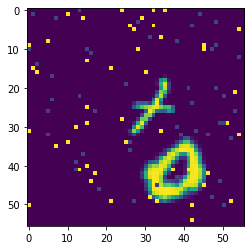

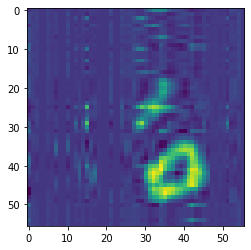

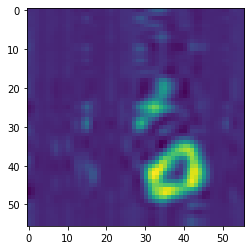

In [ ]:
plt.imshow(X_test[0], interpolation = 'None')
plt.show()
#plt.imshow(sk.util.random_noise(X_test[0], mode='gaussian', clip=True), interpolation = 'None')
#plt.show()

#kernel = np.ones((3,1), np.uint8)
#plt.imshow(cv2.dilate(X_test[0], kernel, iterations=1), interpolation = 'None')
#plt.show()

#plt.imshow(cv2.blur(X_test[0], (3, 3)))
#plt.show()
#stretch = (random.random() - 0.5)
#wStretched = max(int(X_test[0].shape[1] * (1 + stretch)), 1)
#plt.imshow(cv2.resize(X_test[0], (wStretched, X_test[0].shape[0])), interpolation = 'None')
#plt.show()

pca=PCA(5)
img=pca.fit_transform(X_test[0])
img=pca.inverse_transform(img)
plt.imshow(img, interpolation = 'None')
plt.show()

plt.imshow(cv2.GaussianBlur(img, (3, 3), 0), interpolation = 'None')
plt.show()

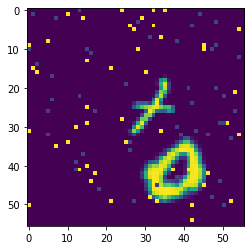

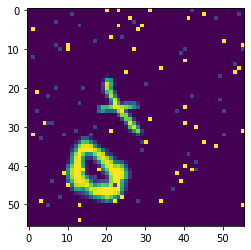

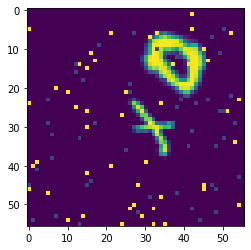

In [ ]:
plt.imshow(X_test[0], interpolation = 'None')
plt.show()
plt.imshow(np.fliplr(X_test[0]), interpolation = 'None')
plt.show()
plt.imshow(np.flipud(X_test[0]), interpolation = 'NOne')
plt.show()

##Split Train and Validation Set:

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1) 

In [ ]:
x_train.shape[0]

24000

##Data Augmentation:

In [ ]:
"""
augmentted_train_data = np.empty((144000,56,56))
augmentted_target_data = np.empty((144000,36))
#augmentted_train_data = np.empty((120000,56,56))
#augmentted_target_data = np.empty((120000,36))
pca=PCA(10)
for i in tqdm(range(x_train.shape[0])):
    
    img=pca.fit_transform(x_train[i])
    img=pca.inverse_transform(img)

    augmentted_train_data[i]=(x_train[i])
    augmentted_train_data[24000+i] = (rotate(img, angle=60, mode = 'wrap'))
    augmentted_train_data[48000+i] = (rotate(img, angle=30, mode = 'wrap'))
    augmentted_train_data[72000+i] = (rotate(img, angle=-30, mode = 'wrap'))
    augmentted_train_data[96000+i] = cv2.GaussianBlur(img, (3, 3), 0)
    augmentted_train_data[120000+i] = (rotate(img, angle=-60, mode = 'wrap'))
    #augmentted_train_data[144000+i] = (rotate(img, angle=60, mode = 'wrap'))
    for j in range(6):
        augmentted_target_data[(j*24000)+i] = (y_train[i])
"""

"\naugmentted_train_data = np.empty((144000,56,56))\naugmentted_target_data = np.empty((144000,36))\n#augmentted_train_data = np.empty((120000,56,56))\n#augmentted_target_data = np.empty((120000,36))\npca=PCA(10)\nfor i in tqdm(range(x_train.shape[0])):\n    \n    img=pca.fit_transform(x_train[i])\n    img=pca.inverse_transform(img)\n\n    augmentted_train_data[i]=(x_train[i])\n    augmentted_train_data[24000+i] = (rotate(img, angle=60, mode = 'wrap'))\n    augmentted_train_data[48000+i] = (rotate(img, angle=30, mode = 'wrap'))\n    augmentted_train_data[72000+i] = (rotate(img, angle=-30, mode = 'wrap'))\n    augmentted_train_data[96000+i] = cv2.GaussianBlur(img, (3, 3), 0)\n    augmentted_train_data[120000+i] = (rotate(img, angle=-60, mode = 'wrap'))\n    #augmentted_train_data[144000+i] = (rotate(img, angle=60, mode = 'wrap'))\n    for j in range(6):\n        augmentted_target_data[(j*24000)+i] = (y_train[i])\n"

In [ ]:
def img_denoise(img):
  img = np.uint8(np.clip((2 * (np.int16(img) - 50) + 60), 0, 255))
  img=cv2.fastNlMeansDenoising(img, h=45.0)
  res[res<100]=0
  #img = np.double(img)
  return img

In [ ]:
augmentted_train_data = np.empty((144000,56,56))
augmentted_target_data = np.empty((144000,36))
#augmentted_train_data = np.empty((120000,56,56))
#augmentted_target_data = np.empty((120000,36))
#pca=PCA(10)
for i in tqdm(range(x_train.shape[0])):
    
    #img=pca.fit_transform(x_train[i])
    #img=pca.inverse_transform(img)
    img = img_denoise(x_train[i])

    augmentted_train_data[i]=(x_train[i])
    augmentted_train_data[24000+i] = (rotate(img, angle=15, mode = 'wrap'))
    augmentted_train_data[48000+i] = (rotate(img, angle=30, mode = 'wrap'))
    augmentted_train_data[72000+i] = (rotate(img, angle=-30, mode = 'wrap'))
    #augmentted_train_data[96000+i] = cv2.GaussianBlur(img, (3, 3), 0)
    augmentted_train_data[96000+i] = (rotate(img, angle=7, mode = 'wrap'))
    augmentted_train_data[120000+i] = (rotate(img, angle=-15, mode = 'wrap'))
    #augmentted_train_data[144000+i] = (rotate(img, angle=60, mode = 'wrap'))
    for j in range(6):
        augmentted_target_data[(j*24000)+i] = (y_train[i])

100%|██████████| 24000/24000 [02:11<00:00, 182.39it/s]


In [ ]:
train_data = []
for i in tqdm(range(len(augmentted_train_data))):
  train_data.append([augmentted_train_data[i],  augmentted_target_data[i]])
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=36, pin_memory=True)

val_data = []
for i in tqdm(range(len(x_val))):
  val_data.append([x_val[i],y_val[i]])
val_loader = torch.utils.data.DataLoader(val_data, shuffle=False, batch_size=36, pin_memory=True)

test_data = []
for i in tqdm(range((len(X_test)))):
  test_data.append([X_test[i],0])
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, batch_size=36, pin_memory=True)

100%|██████████| 15000/15000 [00:00<00:00, 670452.16it/s]


In [ ]:
test_data_pca = []
for i in tqdm(range((len(X_test)))):
  #img =pca.fit_transform(X_test[i])
  #img =pca.inverse_transform(img)
  img = img_denoise(x_train[i])
  test_data_pca.append([X_test[i],0])
test_loader_pca = torch.utils.data.DataLoader(test_data_pca, shuffle=False, batch_size=36, pin_memory=True)

100%|██████████| 15000/15000 [00:33<00:00, 451.86it/s]


In [ ]:
len(train_data)

144000

# CNN Models


## CNN Model we started with

In [ ]:
# Model we started with
torch.manual_seed(0)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.cnn_layers = nn.Sequential(
            nn.Conv2d(1, 6, 3), #56-3+1 = 54/2=27
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(6, 16, 3),#27-3+1 = 25/2= 12
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, 3, padding=1),#12-3+2+1 = 12
            nn.ReLU(),
            nn.Conv2d(32, 64, 3,padding=1),#12-3+2+1 =12
            nn.ReLU(),
            nn.Conv2d(64, 128, 3,padding=1),#12-3+2+1 =12
            nn.ReLU(),
            nn.Conv2d(128, 256, 3),#12-3+1 =10/2=5
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.linear_layers = nn.Sequential(
            nn.Linear(6400, 1000), #self.fc1 = nn.Linear(256*5*5, 3000) 
            nn.ReLU(),
            nn.Linear(1000,500),
            nn.ReLU(),
            nn.Linear(500, 72),
            nn.ReLU(),
            nn.Linear(72, 36),
        )
    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features   
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(-1, self.num_flat_features(x))
        x = self.linear_layers(x)
        return x

## vgg16_bn


In [ ]:
import torchvision.models as models
#device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ft = models.vgg16_bn(pretrained=False)
model_ft = model_ft.eval()

In [ ]:
model_ft

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer0 = nn.Conv2d(1,3,2)
        self.layer2 = nn.Linear(512,25088)
        self.layer1 = nn.Linear(1000,36)
        self.conv = model_ft.features
        self.net = model_ft.classifier
        for p in self.net.parameters():
            p.requires_grad=False

    def forward(self,x):
        x = self.layer0(x)
        x = self.conv(x)
        x = x.reshape(x.size(0), -1)
        x = self.layer2(x)
        x1 = self.net(x)
        y = self.layer1(x1)
        return y



## Ruohan's last model

In [ ]:
# Ruohan's last model 
#best model so far achieved max at 67% for original size
#edit output channel numbers maybe overfitting
#add gaussian noise layer
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3) #56-3+1 = 54/2=27
        self.bn1 = nn.BatchNorm2d(6)
        #pooling
        self.conv2 = nn.Conv2d(6, 16, 3)#27-3+1 = 25/2= 12
        self.bn2 = nn.BatchNorm2d(16)
        #pooling
        self.conv3 = nn.Conv2d(16, 32, 3, padding=1)#12-3+2+1 = 12
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 64, 3,padding=1)#12-3+2+1 =12
        # example of doing normalization 
        self.bn4 = nn.BatchNorm2d(64)
        self.conv5 = nn.Conv2d(64, 128, 3,padding=1)#12-3+2+1 =12
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 256, 3)#12-3+1 =10
        self.bn6 = nn.BatchNorm2d(256)
        self.conv7 = nn.Conv2d(256, 512, 3)#10-3+1 =8
        self.bn7 = nn.BatchNorm2d(512)
        self.conv8 = nn.Conv2d(512, 256, 3)#8-3+1 =6
        self.bn8 = nn.BatchNorm2d(256)
        self.conv9 = nn.Conv2d(256, 128, 3)#6-3+1 =4
        self.bn9 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(2048, 500) #self.fc1 = nn.Linear(128*4*4, 3000) 
        # self.fc2 = nn.Linear(1000,500)
        self.fc2 = nn.Linear(500, 72)
        self.fc3 = nn.Linear(72, 36)

    def forward(self, x):
        x = self.conv1(x) 
        x = F.relu(x)
        x = F.max_pool2d(x,2,2)
        x = self.bn1(x)
        x = self.conv2(x) 
        # example of dropout
        #x = F.dropout(x,0.3)
        x = F.relu(x)
        x = F.max_pool2d(x,2,2)
        x = self.bn2(x)
        x = F.relu(self.conv3(x))
        x = self.bn3(x)
        x = F.relu(self.conv4(x))
        # example of calling normalization. note the channel has to match the output channel of previous layer
        x = self.bn4(x)
        x = F.relu(self.conv5(x))
        x = self.bn5(x)
        x = self.conv6(x) 
        x = F.relu(x)
        x = self.bn6(x)
        x = F.relu(self.conv7(x))
        x = self.bn7(x)
        x = F.relu(self.conv8(x))
        x = self.bn8(x)
        x = F.relu(self.conv9(x))
        x = self.bn9(x)
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        # x = F.softmax(x,dim=1)
        # x = F.relu(x)
        # x = self.fc4(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

## Dawei's final model

In [ ]:
#experiment model

dropout=0.10
output_dim=36
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__() 
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, 2), # conv1
            nn.ReLU(),
            nn.Conv2d(32, 32, 2), # conv2
            nn.BatchNorm2d(32), # bn_32
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(dropout))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, 2), # conv3
            nn.ReLU(),
            nn.Conv2d(64, 64, 3), # conv4
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Dropout(dropout))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, 3), # conv5
            nn.ReLU(),
            nn.Conv2d(128, 128, 3), # conv6
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(dropout))
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 256, 2,padding='same'), #conv7
            nn.ReLU(),
            nn.Conv2d(256, 256, 2,padding='same'), #CONV8
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(dropout))
         # new
        self.layer5 = nn.Sequential(
            nn.Conv2d(256, 512, 2,padding='same'), #conv7
            nn.ReLU(),
            nn.Conv2d(512, 512, 2,padding='same'), #CONV8
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, stride=2),
            nn.Dropout(dropout))
        

        self.fc = nn.Linear(512, 500)
        self.fc2 = nn.Linear(500, 72)
        self.fc3 = nn.Linear(72, output_dim)
    def forward(self, x):

        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        #new
        out = self.layer5(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        out = self.fc2(out)
        out = self.fc3(out)
        return out


## Resnext


In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnext50_32x4d', pretrained=False)
# or
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnext101_32x8d', pretrained=True)
model.eval()

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN,self).__init__()
        self.layer0 = nn.Conv2d(1,3,2)
        #self.layer2 = nn.Linear(512,25088)
        self.layer1 = nn.Linear(1000,36)
        self.conv = model
        #self.net = model.classifier
        #for p in self.net.parameters():
        #    p.requires_grad=False

    def forward(self,x):
        
        x = self.layer0(x)
        #print(x)
        x = self.conv(x)
        
        x = x.reshape(x.size(0), -1)
        #x = self.layer2(x)
        #x1 = self.net(x)
        
        y = self.layer1(x)
        return y



# Mondel training and validation

In [ ]:
# a map for the class
import string
chars = [0,1,2,3,4,5,6,7,8,9] + list(string.ascii_lowercase)

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
convNet = CNN().to(device)
convNet

CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(2, 2), stride=(1, 1))
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.1, inplace=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(2, 2), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Dropout(p=0.1, inplace=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affi

In [ ]:
# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(convNet.parameters(), lr=0.001, momentum=0.9)
#optimizer = optim.Adam(convNet.parameters())

Function for Training the Model:

In [ ]:
from statistics import mean
def train_model (model, optimizer, EPOCHS, train_loader):
  train_loss_list = []
  loss = 0.0
  for i in range(EPOCHS):
    print("the %d th epoch..." %i)
    for k, data in enumerate(train_loader):
      images, labels = data
      if torch.cuda.is_available():
            images=images.cuda()
            labels=labels.cuda()
      optimizer.zero_grad()
      output_train = model(images.unsqueeze(1).float())
      train_loss = criterion(output_train, labels)
      train_loss_list.append(train_loss)
      train_loss.backward()
      optimizer.step()
      loss += train_loss.item()
      if k%100 == 99:
          print(k+1, 'mini-batch of',i, '-th epoch','train loss :', loss/100)
          loss = 0.0
        
    train_loss_list.append(train_loss.item())
  return train_loss_list

In [ ]:
# Save our trained model
#PATH = './cifar_net.pth'
#torch.save(convNet.state_dict(), PATH)

In [ ]:
# load trained model
#model = torch.load('./cifar_net.pth')

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def cf_matrix(num_true, num_pred, letter_true, letter_pred):
  categ = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
  #letter = "abcdefghijklmnopqrstuvwxyz"

  true = []
  for digit_data,letter_data in zip(num_true, letter_true):
    for digit,letter in zip(digit_data,letter_data):
      true.append(categ[digit])
      true.append(categ[letter+10])

  pred = []
  for digit_data,letter_data in zip(num_pred, letter_pred):
    for digit,letter in zip(digit_data,letter_data):
      pred.append(categ[digit])
      pred.append(categ[letter+10])

  cf_matrix = confusion_matrix(true, pred)
  df_cm = pd.DataFrame(cf_matrix, index=categ, columns=categ)
  plt.figure(figsize=(20,15))
  ax= plt.subplot()
  sns.heatmap(df_cm, cmap='Blues', annot=True)
  #print(true)
  #print(pred)
  #sns.heatmap(cf_matrix, annot=True, cmap='Blues')
  #ax= plt.subplot()
  #plt.subplots(figsize=(20,15))
  #plt.subplots(figsize=(20,15))
  #ax= add_subplot()
  #sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax, cmap='Blues')
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(categ); ax.yaxis.set_ticklabels(categ);


Function for testing the Model:

In [ ]:
def test_model(model,data_loader, training=False, draw_cf_matrix=False):
  correct = 0.0
  total = 0.0
  # for plotting
  num_true = []
  num_pred = []
  letter_true = []
  letter_pred = []
  #
  with torch.no_grad():
      for data in data_loader:
          images, labels = data
          if torch.cuda.is_available():
            images=images.cuda()
            labels=labels.cuda()
          outputs = model(images.unsqueeze(1).float())
          _, num_labels = torch.max(labels[...,:10],1)
          _, letter_labels = torch.max(labels[...,10:],1)       
          _, num_predicted = torch.max(outputs[...,:10],1)
          _, letter_predicted = torch.max(outputs[...,10:], 1)
          total += labels.size(0)
          # for plotting
          num_true.append(num_labels)
          num_pred.append(num_predicted)
          letter_true.append(letter_labels)
          letter_pred.append(letter_predicted)
          #

          correct += ((num_predicted == num_labels) & (letter_predicted == letter_labels)).sum().item()
  if draw_cf_matrix:
    cf_matrix(num_true, num_pred, letter_true, letter_pred)

  if not training:
    print('Accuracy of the network on the  test images: %f %%' % ( correct / total))
    return (100 * correct / total)
  else:
    print('Accuracy of the network on the  training images: %f %%' % ( correct / total))
    return (100 * correct / total)

Apply Trainning and Testing:

In [ ]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0.8
    nesterov: False
    weight_decay: 0
)

In [ ]:
#scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
#scheduler = optim.lr_scheduler.ConstantLR(optimizer, factor=0.8, total_iters=10)
def train_and_test(times, epoch):
  loss = []
  val_acc = []
  train_acc = []
  for time in range(times):
    print("Training for the", time+1, '-th times')
    loss.extend(train_model(convNet, optimizer, epoch, train_loader))
    if time == times-1:
      train_acc.append(test_model (convNet, train_loader, training=True, draw_cf_matrix=True))
      val_acc.append(test_model (convNet, val_loader, draw_cf_matrix=True))
      break
      
    train_acc.append(test_model (convNet, train_loader, training=True))
    val_acc.append(test_model (convNet, val_loader))
  return loss, train_acc, val_acc
  '''
  num_times = np.array(range(1,times+1))
  num_epoch = np.array(range(1,times*epoch+1))
  plt.plot(num_epoch, loss)
  plt.title("training loss vs epochs")
  plt.show()

  plt.plot(num_times, train_acc, label="training")
  plt.plot(num_times, val_acc, label="validation")
  plt.title("accuracy vs training times")
  plt.legend()
  plt.show()
  '''

In [ ]:
def draw_graph(times, epoch, loss, train_acc, val_acc):
  num_times = np.array(range(1,times+1))
  num_epoch = np.array(range(1,times*epoch+1))
  plt.plot(num_epoch, loss)
  plt.title("training loss vs epochs")
  plt.xlabel('epoch')
  plt.ylabel('training loss')
  plt.show()

  plt.plot(num_times, train_acc, label="training")
  plt.plot(num_times, val_acc, label="validation")
  plt.title("accuracy vs training times")
  plt.xlabel('times')
  plt.ylabel('accuracy')
  plt.legend()
  plt.show()

In [ ]:
loss, train_acc, val_acc = train_and_test(10, 3)

Training for the 1 -th times
the 0 th epoch...


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/conv.py:443: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  ../aten/src/ATen/native/Convolution.cpp:647.)
  self.padding, self.dilation, self.groups)


100 mini-batch of 0 -th epoch train loss : 7.0084287161297265
200 mini-batch of 0 -th epoch train loss : 6.94454331000646
300 mini-batch of 0 -th epoch train loss : 6.919371776713267
400 mini-batch of 0 -th epoch train loss : 6.9026539651552845
500 mini-batch of 0 -th epoch train loss : 6.881711137559679
600 mini-batch of 0 -th epoch train loss : 6.833616836004787
700 mini-batch of 0 -th epoch train loss : 6.807869549426764
800 mini-batch of 0 -th epoch train loss : 6.764726279063358
900 mini-batch of 0 -th epoch train loss : 6.724928600142402
1000 mini-batch of 0 -th epoch train loss : 6.701841818706856
1100 mini-batch of 0 -th epoch train loss : 6.647461689942413
1200 mini-batch of 0 -th epoch train loss : 6.621964885451726
1300 mini-batch of 0 -th epoch train loss : 6.567880469345386
1400 mini-batch of 0 -th epoch train loss : 6.505481438347034
1500 mini-batch of 0 -th epoch train loss : 6.460291526052686
1600 mini-batch of 0 -th epoch train loss : 6.400798836979601
1700 mini-batch 

In [ ]:
draw_graph(10, 3, loss, train_acc, val_acc)

In [ ]:
'''
def draw_graph(loss, train_acc, val_acc):
  #num_times = np.array(range(1,times+1))
  #num_epoch = np.array(range(1,times*epoch+1))
  plt.plot(loss)
  #plt.plot(num_epoch, loss)
  plt.title("training loss vs epochs")
  plt.show()

  plt.plot(train_acc, label="training")
  plt.plot(val_acc, label="validation")

  #plt.plot(num_times, train_acc, label="training")
  #plt.plot(num_times, val_acc, label="validation")
  plt.title("accuracy vs training times")
  plt.show()
'''

Training for the 1 -th times
the 0 th epoch...
100 mini-batch of 0 -th epoch train loss : 2.5395047070965564
200 mini-batch of 0 -th epoch train loss : 2.5597643813884097
300 mini-batch of 0 -th epoch train loss : 2.5352035173804817
400 mini-batch of 0 -th epoch train loss : 2.5472834152241957
500 mini-batch of 0 -th epoch train loss : 2.508414154525638
600 mini-batch of 0 -th epoch train loss : 2.502131353440797
700 mini-batch of 0 -th epoch train loss : 2.5329465382908363
800 mini-batch of 0 -th epoch train loss : 2.526924957474176
900 mini-batch of 0 -th epoch train loss : 2.534739301708629
1000 mini-batch of 0 -th epoch train loss : 2.5343368590209225
1100 mini-batch of 0 -th epoch train loss : 2.4801362712489845
1200 mini-batch of 0 -th epoch train loss : 2.4751320620740036
1300 mini-batch of 0 -th epoch train loss : 2.51109443366631
1400 mini-batch of 0 -th epoch train loss : 2.4945990949776022
1500 mini-batch of 0 -th epoch train loss : 2.463304573872851
1600 mini-batch of 0 -th

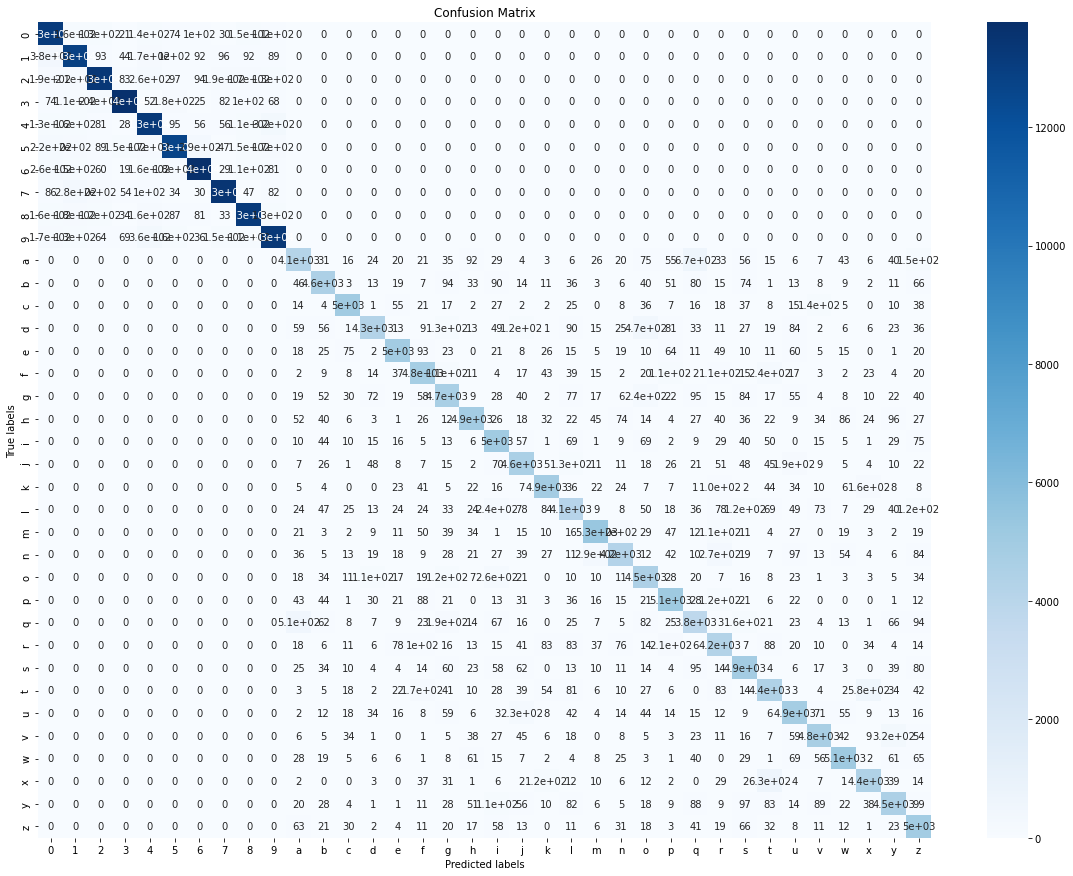

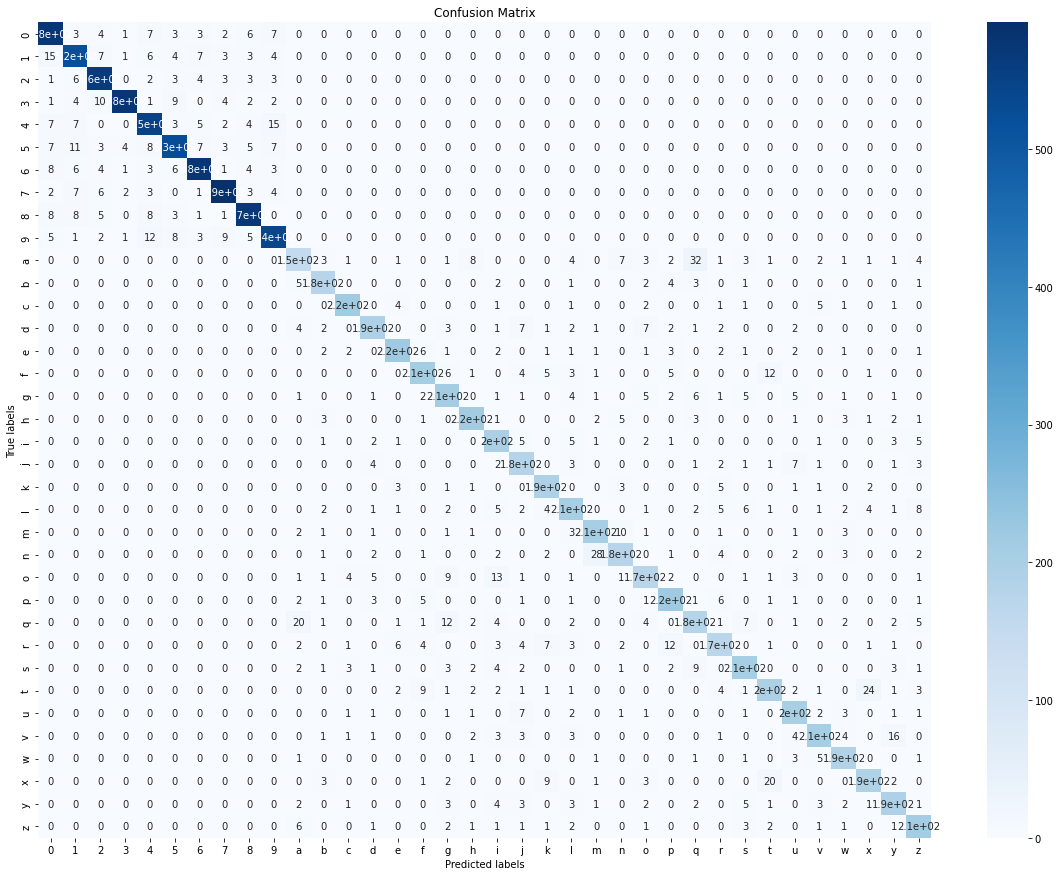

In [ ]:
loss, train_acc, val_acc = train_and_test(1, 1)

In [ ]:
train_and_test(1, 2)

#Output Test Data Prediction

In [ ]:
# a helper method to convert predicted index to a y_hat
def format_result(digit, letter):
  formatted_output = ['0']*36
  formatted_output[digit]='1'
  formatted_output[letter+10] = '1'
  out=''.join(formatted_output)
  return out

In [ ]:
# predict with original data
import pandas as pd
out=[]
with torch.no_grad():
    for data in test_loader:
      images = data[0]
      if torch.cuda.is_available():
        images=images.cuda()
      
      outputs = convNet(images.unsqueeze(1).float())
      _, num_labels = torch.max(outputs[...,:10],1)
      _, letter_labels = torch.max(outputs[...,10:],1)
      out+=[format_result(digit,letter) for digit, letter in zip(num_labels,letter_labels)]
      
        
        
out= pd.DataFrame(out)
out.index.name = '# Id'
out.columns = ["Category"]

In [ ]:
# predict with the data after pca
import pandas as pd
out=[]
with torch.no_grad():
    for data in test_loader_pca:
      images = data[0]
      if torch.cuda.is_available():
        images=images.cuda()
      
      outputs = convNet(images.unsqueeze(1).float())
      _, num_labels = torch.max(outputs[...,:10],1)
      _, letter_labels = torch.max(outputs[...,10:],1)
      out+=[format_result(digit,letter) for digit, letter in zip(num_labels,letter_labels)]
      
        
        
out= pd.DataFrame(out)
out.index.name = '# Id'
out.columns = ["Category"]

In [ ]:
import pandas as pd
out=[]
with torch.no_grad():
    for data in test_loader_pca:
      images = data[0]
      if torch.cuda.is_available():
        images=images.cuda()
      
      outputs = model_ft(images.unsqueeze(1).float())
      _, num_labels = torch.max(outputs[...,:10],1)
      _, letter_labels = torch.max(outputs[...,10:],1)
      out+=[format_result(digit,letter) for digit, letter in zip(num_labels,letter_labels)]
      
        
        
out= pd.DataFrame(out)
out.index.name = '# Id'
out.columns = ["Category"]

In [ ]:
out.head()

,Category
# Id,
0,100000000000000000000000000001000000
1,000010000000000000000100000000000000
2,000000000100000000010000000000000000
3,100000000000000000000100000000000000
4,000000100000000000010000000000000000


In [ ]:
from google.colab import files
out.to_csv('predict_result.csv') 
files.download('predict_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>